In [1]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(x, 0)

def f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return np.linalg.norm(residual)**2

def grad_f(A, x, b):
    residual = relu(np.dot(A, x) - b)
    return 2 * np.dot(np.transpose(A), residual)

def hessian_f(A, x, b):
    # Compute the residual
    residual = np.dot(A, x) - b
    # Create a diagonal matrix where each element is 1 if the corresponding residual is positive, 0 otherwise
    diag = np.diag((residual > 0).astype(float).flatten())
    # Compute the Hessian
    H = 2 * np.dot(np.dot(np.transpose(A), diag), A)
    return H

def newton_method(f, grad_f, hessian_f, x0,A, b, tol=1e-6, max_iter=100, alpha=1.0):
    """
    Newton's method for non-linear optimization with line search.

    Parameters:
    f (function): The objective function.
    grad_f (function): The gradient of the objective function.
    hessian_f (function): The Hessian of the objective function.
    x0 (np.ndarray): The initial guess.
    tol (float): The convergence tolerance.
    max_iter (int): The maximum number of iterations.
    alpha (float): Initial step size for line search.

    Returns:
    np.ndarray: The point that minimizes the objective function.
    """
    x = x0
    minimum_values = []  # List to store the minimum values in each iteration
    for i in range(max_iter):
        gradient = grad_f(A, x, b)
        hessian = hessian_f(A, x, b)
        
        # Ensure the Hessian is invertible
        try:
            delta_x = np.linalg.solve(hessian, -gradient)
        except np.linalg.LinAlgError:
            print("Hessian is not invertible. Optimization failed.")
            return x, minimum_values
        
        # Line search to find the optimal step size
        t = alpha
        while f(A, x + t * delta_x, b) > f(A, x, b) + 0.1 * t * np.dot(gradient.flatten(), delta_x.flatten()):
            t *= 0.5
        
        x = x + t * delta_x
        minimum_values.append(f(A, x, b))  # Append the minimum value to the list
        
        # Check for convergence
        if np.linalg.norm(gradient) < tol:
            print(f"Converged after {i+1} iterations.")
            return x, minimum_values
        
    print("Did not converge after the maximum number of iterations.")
    return x

Converged after 61 iterations.
Minimum found at: [[ 1.39116105e+01]
 [ 1.40215749e+01]
 [ 5.93136311e+00]
 [-1.19388324e-02]
 [-1.09603698e+01]
 [ 4.96027008e+00]
 [-1.72202403e+00]
 [-1.88492381e+01]
 [ 2.05644110e+00]
 [-6.19778184e+00]
 [ 5.96660105e+00]
 [ 2.84051165e+01]
 [-8.98698366e+00]
 [ 1.44010674e+01]
 [ 4.08766778e+01]
 [ 2.59870782e+01]
 [-2.01385373e+01]
 [-3.64399043e+00]
 [ 1.31756713e+01]
 [ 1.44932313e-02]
 [ 2.69308294e+01]
 [ 7.14075822e+00]
 [-2.23278691e+01]
 [-9.00418510e+00]
 [ 1.92011262e+01]
 [ 3.97065299e+00]
 [ 2.94255546e+00]
 [ 3.32163669e+01]
 [-4.54759390e+00]
 [ 9.74605562e+00]
 [-6.33272329e+00]
 [ 3.64863599e+01]
 [-8.93772271e+00]
 [ 9.96128649e-01]
 [-1.40487613e+01]
 [-1.72384421e+01]
 [-4.25596311e+00]
 [-6.77241542e+00]
 [ 8.65407312e+00]
 [-4.87039311e+00]
 [ 1.12910518e+01]
 [ 4.62847963e+00]
 [ 4.31081217e+01]
 [ 1.15883293e+01]
 [ 8.96121878e+00]
 [-7.16838069e+00]
 [-1.82004861e+01]
 [-2.27582574e+01]
 [ 3.05435068e+01]
 [-1.50557838e+01]
 

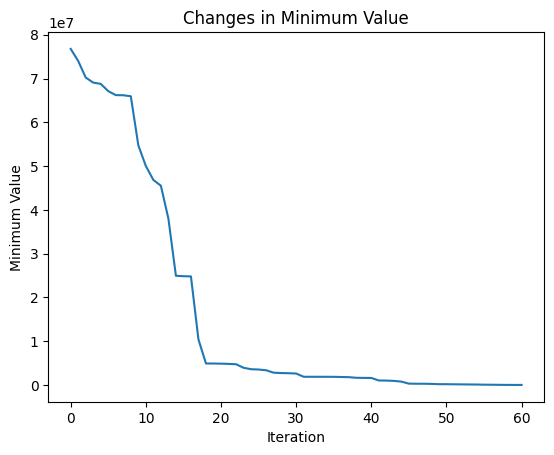

[76766466.47463812, 74005946.42149799, 70222937.93734467, 69072562.03153272, 68775119.22104396, 67119814.34054428, 66214422.62055674, 66182761.0488783, 65953124.40587357, 54734050.909688696, 50012273.07793084, 46831108.05487479, 45511752.0943343, 38002736.24856192, 24935946.461302124, 24838635.54352445, 24792805.44668543, 10380741.14250118, 4895469.822165335, 4891832.946988699, 4856259.677819986, 4806368.495864414, 4730145.55736053, 3919446.1064012977, 3587512.057446211, 3519747.670165124, 3350298.0966709265, 2799543.0278389407, 2709791.6932213996, 2673647.9037362845, 2603080.3881348176, 1860139.4455499505, 1859711.1507802971, 1859296.9954398838, 1854847.9143831271, 1848822.1440276653, 1811775.7017584597, 1772853.870441325, 1629441.7707853592, 1601152.9483367638, 1598678.188314422, 1013652.1029666027, 993221.2262540547, 920272.7178884997, 758045.4303230327, 294837.566391408, 272408.720648667, 269850.38121208677, 236914.95354001614, 170093.89044672172, 167734.37484442582, 141542.6533891

In [2]:
m = int(input("please enter n")) 
n = int(input("please enter m"))

# Generate random A, x, and b
np.random.seed(42)
A = 10 * (np.random.randn(m, n) - np.random.randn(m, n))
x_true = np.random.randn(n, 1) - np.random.randn(n, 1)
b = np.dot(A, x_true) + 0.01 * np.eye(m).dot(np.maximum(np.dot(A, x_true) - np.random.randn(m, 1), 0))

# Initial guess
x0 = np.random.randn(n, 1)

# Run Newton's method
minimum, minimum_values = newton_method(f, grad_f, hessian_f, x0, A, b)
print("Minimum found at:", minimum)

# Plot the changes in the minimum value
plt.plot(range(len(minimum_values)), minimum_values)
plt.xlabel('Iteration')
plt.ylabel('Minimum Value')
plt.title('Changes in Minimum Value')
plt.show()

print(minimum_values)